<center><h2>Hierarchical Clustering</h2></center>


<center><img src="https://en.proft.me/media/science/r_hc_tree.png" width="55%"/></center>

By The End Of This Session You Should Be Able To:
----

- Define Hierarchical Clustering in your words
- Plot Hierarchical Clustering with a dendrogram
- Explain the difference between Agglomerative and Divisive Hierarchical Clustering

<center><h2>How should we group these letters?</h2></center>

<center><img src="images/letters-ungrouped.png" width="75%"/></center>

<center><h2>Hierarchical Clustering</h2></center>

<center><table><tr><td><img src='images/letters-grouped.png' width="110%"></td><td><img src='images/letters-dendrogram.png' width="100%"></td></tr></table></center>


Hierarchical Clustering
----

Clustering data points into larger and larger groups.

Group data points as leaves on a tree. 

Hierarchical Clustering Algoritm
-----


1. Assign each point to its own cluster
1. Repeat:
    1. Compute distances between clusters
    1. Merge closest clusters
1. Until all "distant" clusters are merged

We do not specify the number of clusters beforehand. 

We build up the clusters __agglomeratively__, then we can choose whatever level of clustering we want afterward.

How should we define distance between clusters?
------

It's easy to measure the distance between two points, but between clusters it's not as easy. 

__Linkage__: A distance metric between clusters


 <center><img src="images/linkages.png" width="90%"/></center>

Different Linkage choices will result in different Hierarchical Clustering
------

<center><img src="images/linkage_dendrograms.png" width="85%"/></center>

<center><img src="https://www.researchgate.net/profile/Carsten_Walther/publication/273456906/figure/fig3/AS:294866065084419@1447312956501/Example-of-hierarchical-clustering-clusters-are-consecutively-merged-with-the-most.png" width="100%"/></center>

<center><h2>Let's Cluster Whiskeys</h2></center>

<center><img src="https://flaviar.com/gui/file/images/tastes_of_scotch.png" width="60%"/></center>

In [11]:
reset -fs

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import sklearn

import warnings
warnings.filterwarnings('ignore')

palette = "Dark2"
%matplotlib inline

In [13]:
df = pd.read_csv('https://www.mathstat.strath.ac.uk/outreach/nessie/datasets/whiskies.txt')
df.tail(n=1)

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
85,86,Tullibardine,2,3,0,0,1,0,2,1,1,2,2,1,PH4 1QG,289690,708850


Which columns should we drop?
------

In [14]:
columns_to_drop = ['RowID','Postcode',' Latitude',' Longitude']
df.drop(columns_to_drop, axis=1, inplace=True)

### Let's make the index something nice, so we can use it later as a label

In [15]:
df.set_index('Distillery', inplace=True) 

In [16]:
def make_dendrogram(dataframe, linkage_method, metric, color_threshold=None):
    distxy = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(dataframe.values, metric=metric))
    Z = scipy.cluster.hierarchy.linkage(distxy, linkage_method)
    plt.figure(figsize=(25, 10));plt.title('Hierarchical Clustering Dendrogram');    plt.ylabel('distance')#     plt.xlabel('sample index')
    scipy.cluster.hierarchy.dendrogram(Z,
                                       leaf_rotation=90.,   # Rotates the x axis labels
                                       leaf_font_size=12.,  # Font size for the x axis labels
                                       labels = dataframe.index,
                                       color_threshold = color_threshold)

### Which distance metric do we use?



 ### Which linkage should we use?

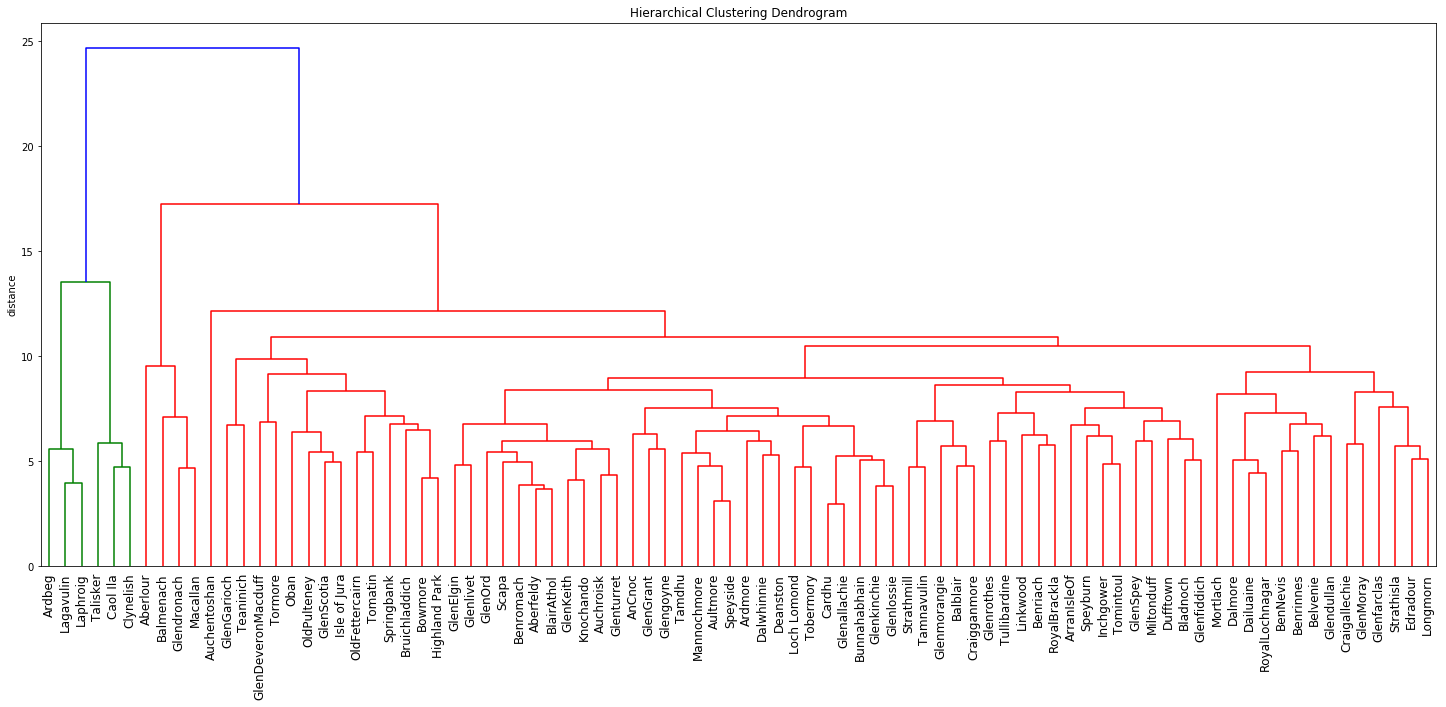

In [19]:
make_dendrogram(df, linkage_method='average', metric='euclidean', color_threshold=None)

2 methods of Hierarchical Clustering
-----

1) Agglomerative:   
"bottom up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

2) Divisive:   
"top down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

<center><img src="https://www.saedsayad.com/images/Clustering_h1.png" width="100%"/></center>


Summary
-----

1. Clustering is grouping similar data together.
1. Often times, creating a hierarchy helps group data.
1. Build groups bottom-up (agglomerative)
1. Build groups top-down (Divisive)

 Bonus Material
-----

How should we evalutate different linkages?
-----

Same as other clustering (e.g., minimal increase sum of squares or minimal increase of variance )

Source: https://stats.stackexchange.com/questions/195446/choosing-the-right-linkage-method-for-hierarchical-clustering